<a href="https://colab.research.google.com/github/tombro27/DS_ML/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix

### Loading Data

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X,y= mnist["data"],mnist["target"]
print(X.shape,y.shape)

(70000, 784) (70000,)


### Glance into data

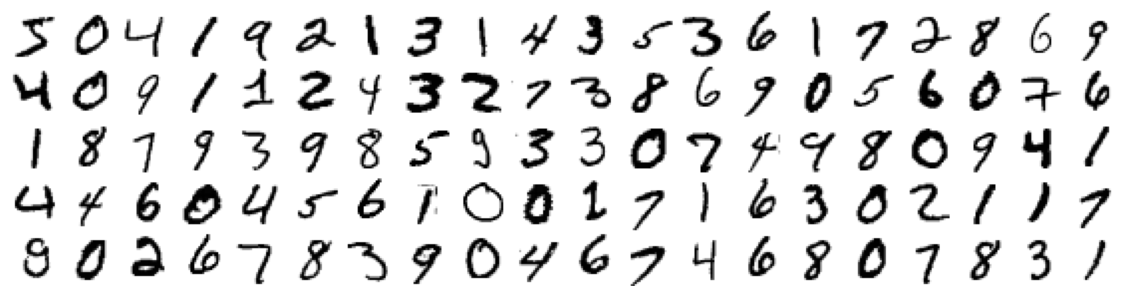

In [12]:
def showDigits(instances, images_per_row=20):
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(28,28) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((28, 28 * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary)
    plt.axis("off")

plt.figure(figsize=(20,10))
example_images = X[:100]
showDigits(example_images)
plt.show()

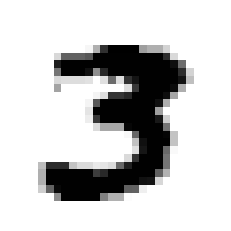

In [ ]:
randDigit = X[27]
randDigitImage = randDigit.reshape(28,28)
plt.imshow(randDigitImage, cmap=mpl.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [ ]:
y[27]

'3'

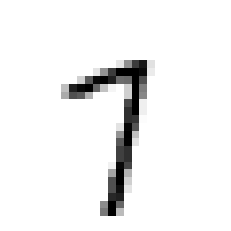

In [ ]:
randDigit2 = X[42]
randDigitImage2 = randDigit2.reshape(28,28)
plt.imshow(randDigitImage2, cmap=mpl.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [ ]:
y[42]

'7'

In [ ]:
randDigits=np.array([randDigit,randDigit2])
randDigits.shape

(2, 784)

In [ ]:
y=y.astype(np.uint8)

In [ ]:
XTrain, XTest, yTrain, yTest = X[:60000], X[60000:],y[0:60000],y[60000:]

In [ ]:
yTrain_3, tTest_3 = (yTrain==3), (yTest==3)

In [ ]:
lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(XTrain, yTrain_3)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_clf.predict([randDigit])

array([ True])

In [ ]:
cross_val_score(lr_clf, XTrain, yTrain_3, cv=3, scoring="accuracy")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.9714 , 0.97265, 0.9716 ])

In [ ]:
yPred_3 = cross_val_predict(lr_clf, XTrain, yTrain_3, cv=3)
confusion_matrix(yTrain_3, yPred_3)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([[53201,   668],
       [ 1019,  5112]])

In [ ]:
f1_score(yTrain_3, yPred_3)

0.8583662161027621

In [ ]:
ovo_clf= OneVsOneClassifier(LogisticRegression(random_state=42))
ovo_clf.fit(XTrain,yTrain)
ovo_clf.predict(randDigits)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([3, 7], dtype=uint8)

In [ ]:
cross_val_score(ovo_clf,XTrain, yTrain,cv=3, scoring="accuracy")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.9193 , 0.91715, 0.92105])

In [ ]:
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(XTrain,yTrain)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
ypred = forest_clf.predict(randDigits)
print(ypred)

[3 7]


In [ ]:
cross_val_score(forest_clf, XTrain, yTrain, cv=3, scoring="accuracy")

array([0.9646 , 0.96255, 0.9666 ])

In [ ]:
xgboost = XGBClassifier(random_state=42)
xgboost.fit(XTrain,yTrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
yPred2=xgboost.predict(randDigits)
print(yPred2)

[3 7]


In [ ]:
cross_val_score(xgboost, XTrain, yTrain, cv=3, scoring="accuracy")

array([0.9315, 0.9301, 0.9335])

In [ ]:
scaler = StandardScaler()
XTrainScaled = scaler.fit_transform(XTrain.astype(np.float64))
cross_val_score(forest_clf, XTrainScaled, yTrain, cv=3, scoring="accuracy")

array([0.96445, 0.96255, 0.96645])

In [ ]:
kRange = list(range(3,8))
weights = ["uniform", "distance"]
param_grid = dict(n_neighbors = kRange, weights = weights)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv = 5, verbose=3,scoring = 'accuracy')
grid.fit(XTrainScaled,yTrain)
print(grid.best_params_)



Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=42, n_jobs=1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=1)
clf.fit(XTrainScaled, yTrain)
clf.best_params_

KeyboardInterrupt: ignored